# Unsupervised Learning - Chapter 1.1 
# Evaluating a Cluster.
    - Measure of Quality:
            - Inform choice, how many cluster to look for
            - K-Mean identified 3 cluster for series of types in IRIS-Dataset
            - Idenfying different clusters(i.e. columns types) and it's values (i.e. it's rows values) is
                - _known as Cross Tabulation_
#### Cross Tabulation with pandas
    - Cluster vs Species is a 'cross-tabulation' 
    - To construct one, use Pandas


In [12]:
# library to import for sklearn - supervised learning
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set the plotting to ggplot (topics to discuss at later point)
plt.style.use('ggplot')

# load the dataset
iris = datasets.load_iris()

# Exploratory data analysis
# In order to set the we will assign FEATURE and TARGET data to X, Y variable

X = iris.data
y = iris.target

# Build the dataframe and then pass the values for columns
samples = pd.DataFrame(X, columns = iris.feature_names)

# view the sample data of 5 rows
samples.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
# Import pandas
import pandas as pd

# create a dataframe
df = pd.DataFrame(X, columns = iris.feature_names)

# print
print(df)

# Use the pandas cross-tab function to build the cross-tabulation.
ct = pd.crosstab(df['labels'], df['species'])

print(ct)

# evaluate the quality
# - Using only samples and their clusters
# - A good clustering has tight clusters
# - and samples in each cluster bunched together

# Inertia measures clustering quality
# - Measures how spreads out the cluster are (lower is better)

# Distance from each sample to centroid of its cluster


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
5                  5.4               3.9                1.7               0.4
6                  4.6               3.4                1.4               0.3
7                  5.0               3.4                1.5               0.2
8                  4.4               2.9                1.4               0.2
9                  4.9               3.1                1.5               0.1
10                 5.4               3.7                1.5               0.2
11                 4.8               3.4                1.6     

KeyError: 'labels'

In [14]:
# Measuring Inertia
# - Measures how spread out the clusters are (lower is better)
# - Distance how each sample to centroid of its cluster
# - After fit(), available as attribute inertia_

from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(samples)
print(model.inertia_)

# The number of clusters
# - Clusters of the iris dataset with different number of clusters

78.85144142614601


#### How to choose clustering ?
    - A good clustering has tight cluster(low inertia)
    - Rule of thumb is to choose 'elbow' in the inertia plot
    

# How many clusters of grain?

In the video, you learned how to choose a good number of clusters for a dataset using the k-means inertia graph. You are given an array samples containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

KMeans and PyPlot (plt) have already been imported for you.

This dataset was sourced from the UCI Machine Learning Repository.

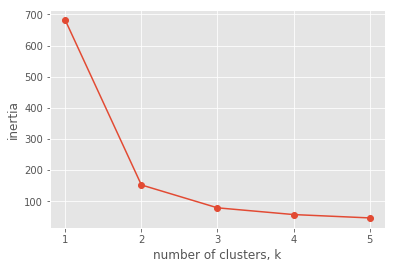

In [5]:
from sklearn.cluster import KMeans
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertia = model.inertia_
    inertias.append(inertia)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


# Evaluating the grain clustering

In the previous exercise, you observed from the inertia plot that 3 is a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". In this exercise, cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

You have the array samples of grain samples, and a list varieties giving the grain variety for each sample. Pandas (pd) and KMeans have already been imported for you.

In [ ]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)


# Transforming features for better clusters
    - piedmont wine dataset
    - 

In [40]:
# library to import for sklearn - supervised learning
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set the plotting to ggplot (topics to discuss at later point)
plt.style.use('ggplot')

# load the dataset
wine = datasets.load_wine()

# Exploratory data analysis
# In order to set the we will assign FEATURE and TARGET data to X, Y variable

wine_data=wine.data
# wine_names = wine.names

# Build the dataframe and then pass the values for columns
wine_sample = pd.DataFrame(wine_data, columns = wine.feature_names)

# view the sample data of 5 rows
wine_sample.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [41]:
# import the wine dataframe to samples and check the clusters by assigning n_clusters=3
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
labels = model.fit_predict(wine_sample)

In [ ]:
# Check the cluster label to check the wine varity
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])


In [43]:
# Due to more feature variances, KMeans on wine dataset doesn't work as expected.
# in KMeans clustering, the variance of a feature corresponds to its influence on the clustering algorithm


#### StandardScaler from scikit.learn
    - Transforms each feature to have mean 0 and variance 1
    - Features are said to be 'standardized'
    - 

In [44]:
# import standard scaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler


In [48]:
# create an standard scaler object
scaler = StandardScaler()

# Fit the model
scaler.fit(wine_sample)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
# Use the transform method standardize any samples
samples_scaled = scaler.transform(wine_sample)

#### Similar Methods
    - StandardScaler and KMeans have similar methods
    - Use fit()/transform() with StandardScaler
    - Use fit()/predict() with KMeans
    

- First step : Standardize the dataset
- Second Step : then use KMeans to cluster
- This can be achieved using skilearn-pipeline, which will help to move the data from one step to other step automatically

In [50]:
# Steps to do pipepline

# Step1 : import standardscaler from scikit.learn
from sklearn.preprocessing import StandardScaler

# Step2 : import KMeans from scikit.learn
from sklearn.cluster import KMeans

# Step3 : import pipeline from scikit.learn
from sklearn.pipeline import make_pipeline

# Make the objects staandardscaler and kmeans
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, kmeans)

In [51]:
# Fit the pipeline by both means (StandardScaler and KMeans)
pipeline.fit(wine_sample)

# Use Predict method cluster the labels
labels = pipeline.predict(wine_sample)


In [ ]:
df = pd.DataFrame({'labels' : labels, 'varieties': varieties})

In [ ]:
ct = pd.crosstab(df['labels'], df['varieties'])

Scaling fish data for clustering

You are given an array samples giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, you'll need to standardize these features first. In this exercise, you'll build a pipeline to standardize and cluster the data.

These fish measurement data were sourced from the Journal of Statistics Education.

In [ ]:
# Perform the necessary imports
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)


Clustering the fish data

You'll now use your standardization and clustering pipeline from the previous exercise to cluster the fish by their measurements, and then create a cross-tabulation to compare the cluster labels with the fish species.

As before, samples is the 2D array of fish measurements. Your pipeline is available as pipeline, and the species of every fish sample is given by the list species.

In [ ]:
# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels':labels ,'species':species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['species'])

# Display ct
print(ct)


Clustering stocks using KMeans

In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array movements of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

Note that Normalizer() is different to StandardScaler(), which you used in the previous exercise. While StandardScaler() standardizes features (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, Normalizer() rescales each sample - here, each company's stock price - independently of the other.

KMeans and make_pipeline have already been imported for you.

In [ ]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)


Which stocks move together?

In the previous exercise, you clustered companies by their daily stock price movements. So which company have stock prices that tend to change in the same way? You'll now inspect the cluster labels from your clustering to find out.

Your solution to the previous exercise has already been run. Recall that you constructed a Pipeline pipeline containing a KMeans model and fit it to the NumPy array movements of daily stock movements. In addition, a list companies of the company names is available.

In [ ]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))
